In [7]:
%pylab inline
import os
import numpy as np
import logging
from time import clock
import random

import sys
sys.path.append('../');

from model.rnn import *
from util.mit_utils import *
import util.my_logging
from util.mocap_utils import *
from util.space import *
from util.plot import *
from util.python_exp2xyz import *
from util.motion import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [29]:
x, seqlen, data_mean, data_std, offsets = load_data('../data/mit/motion.mat', shared=False)
outputs_subdirectory = 'predframehidden256lr0.8tanh'

path_dataset = '../data/mit/'
path_outputs = '../outputs/' + outputs_subdirectory

In [40]:
gen_series_name = 'gen_serie_2.npy'
postprocessed = postprocess(x, data_std.reshape((1, -1)), data_mean.reshape((1, -1)), offsets)
generated = np.load(os.path.join(path_outputs, gen_series_name)) #postprocessed

In [41]:
print postprocessed.shape

generated_xyz = exp2xyz(generated)
print generated_xyz[0].shape

(3826, 108)
(65, 54)


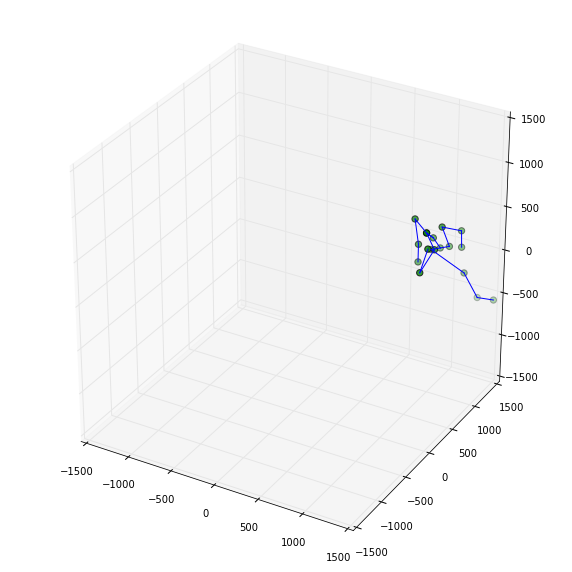

In [42]:
frame = 40

skel = build_plotting_skeleton()

plot_skeleton(skel, generated_xyz[0][frame, :], pos_joi_t=None)

In [20]:
from JSAnimation import IPython_display
from IPython.display import HTML

(65, 54)



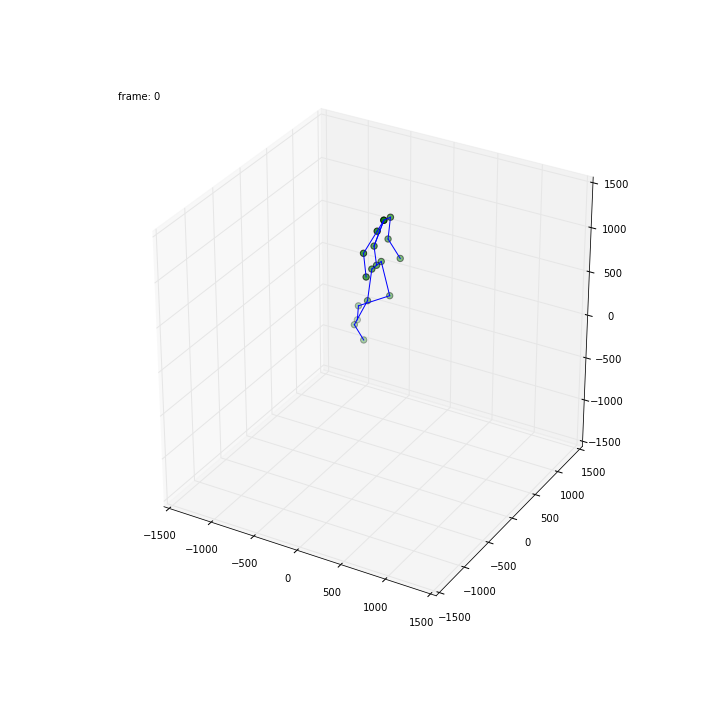
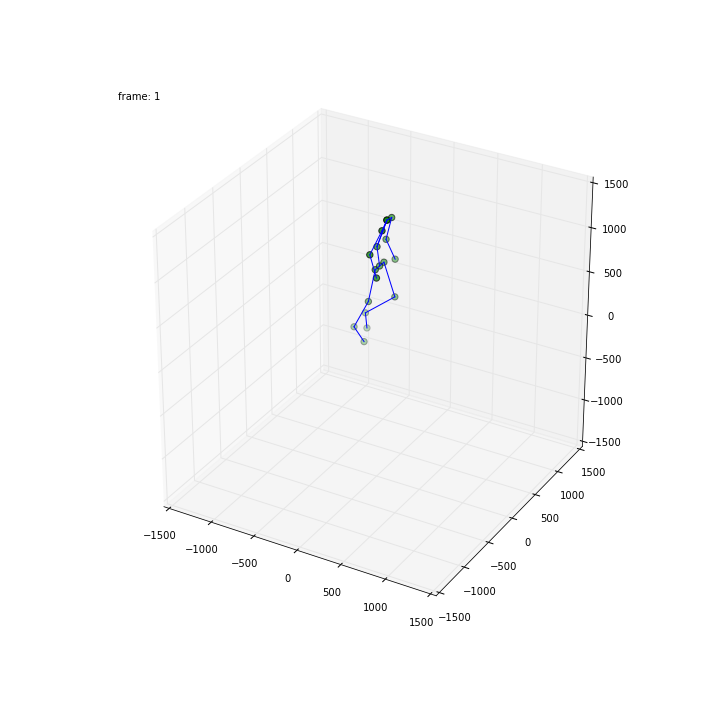
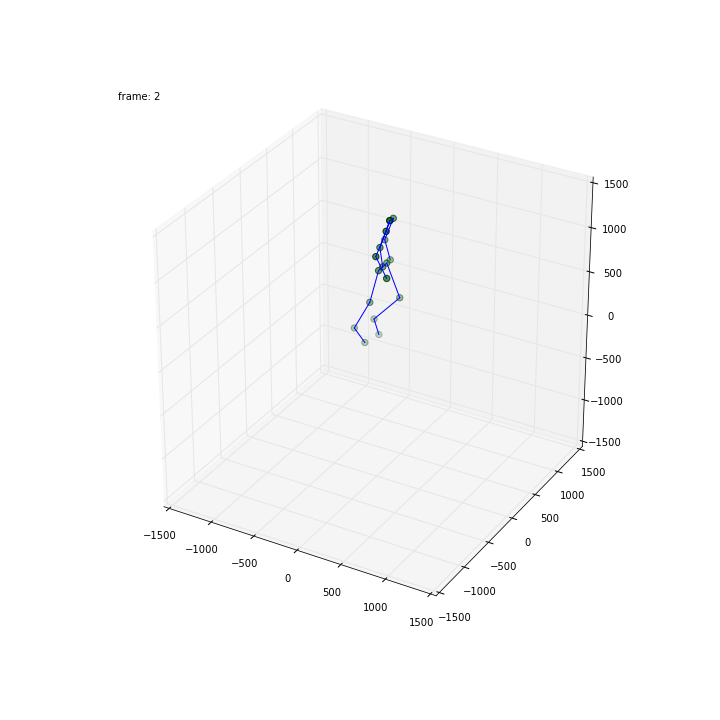
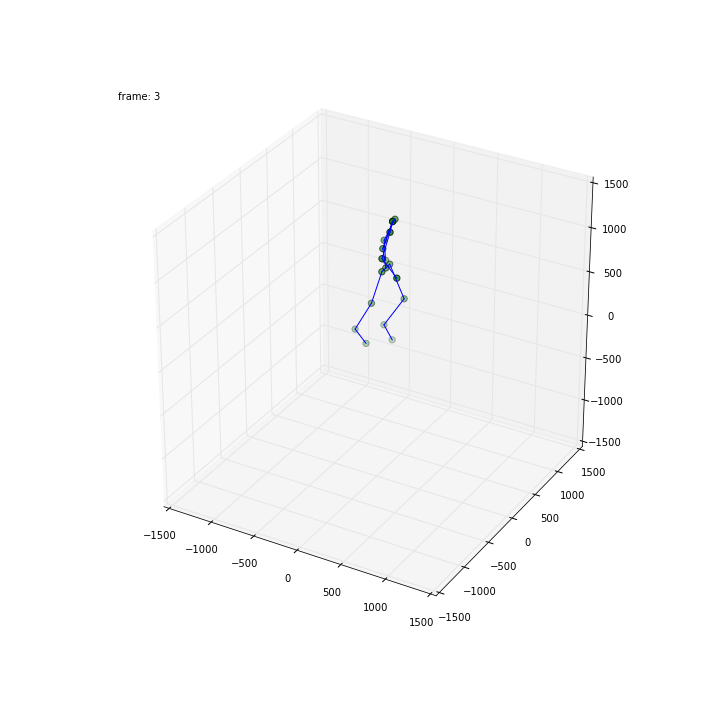
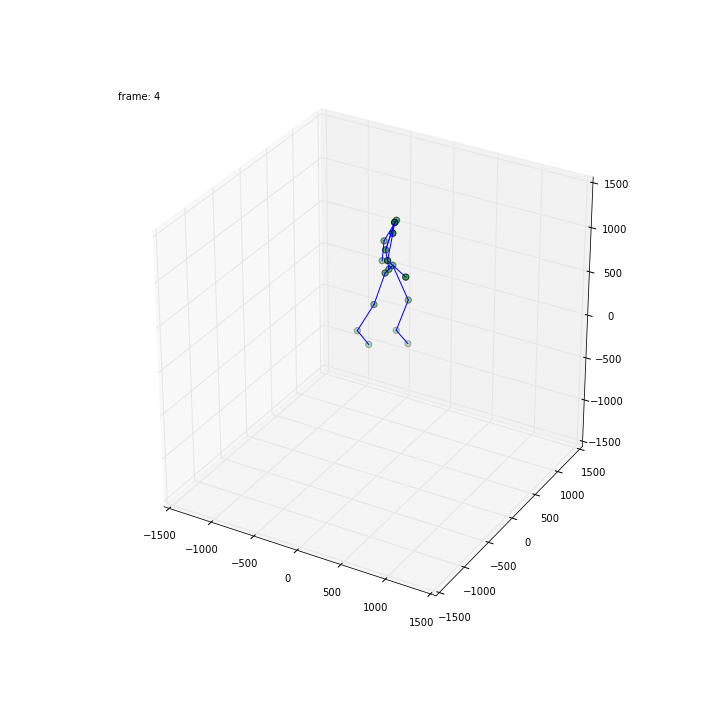
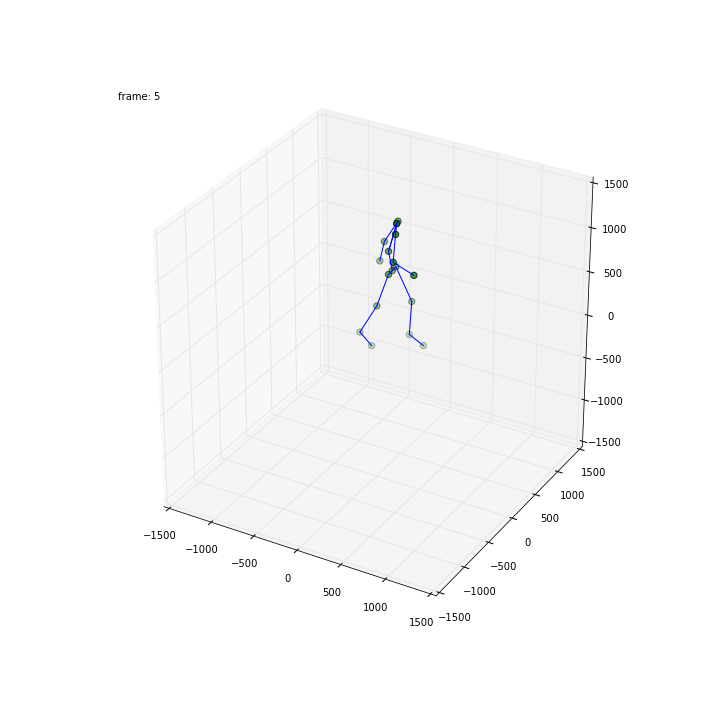
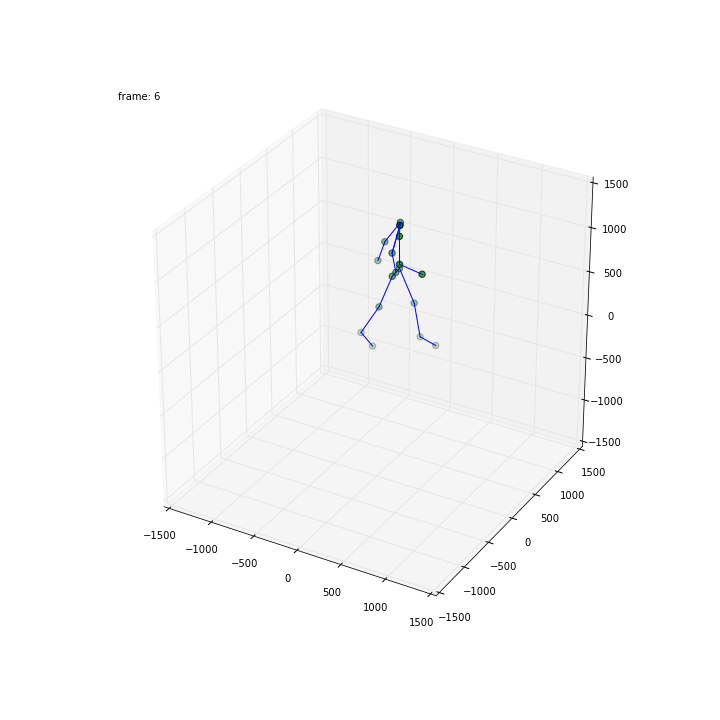
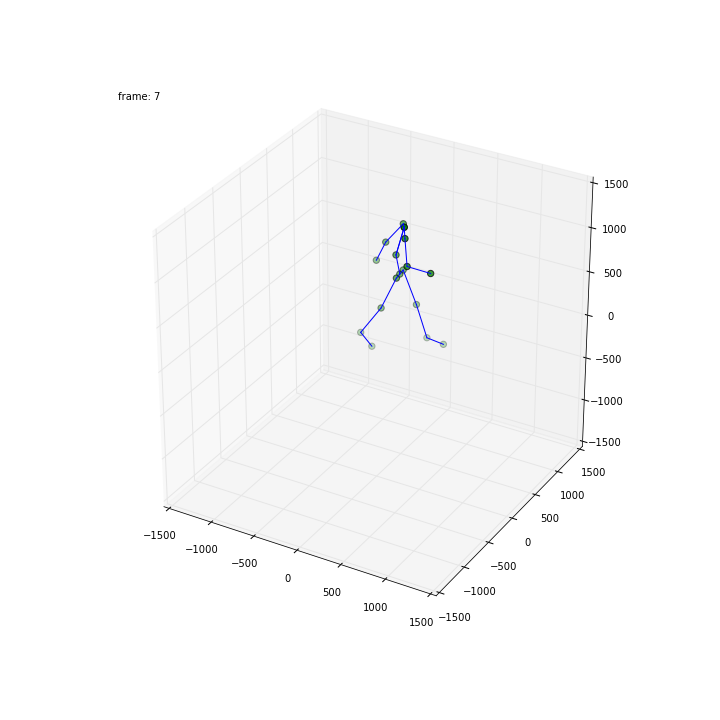
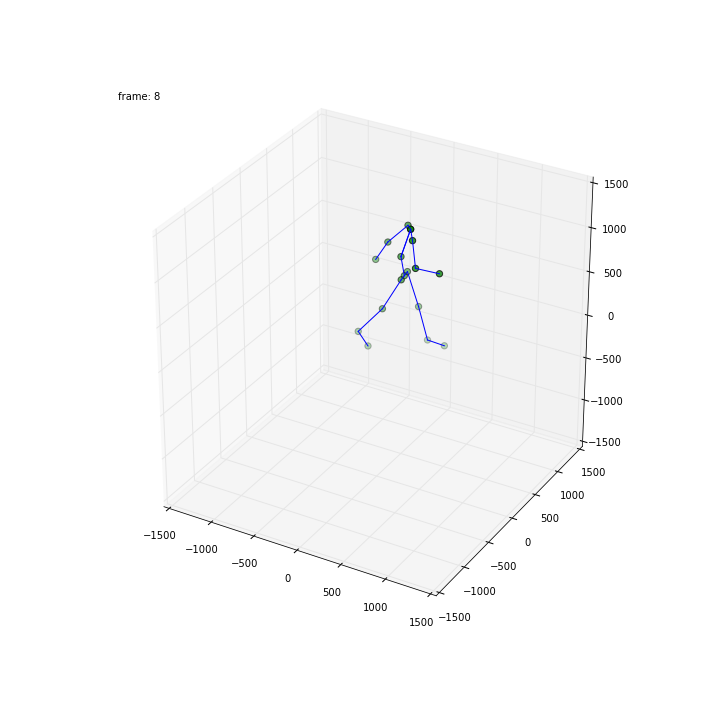
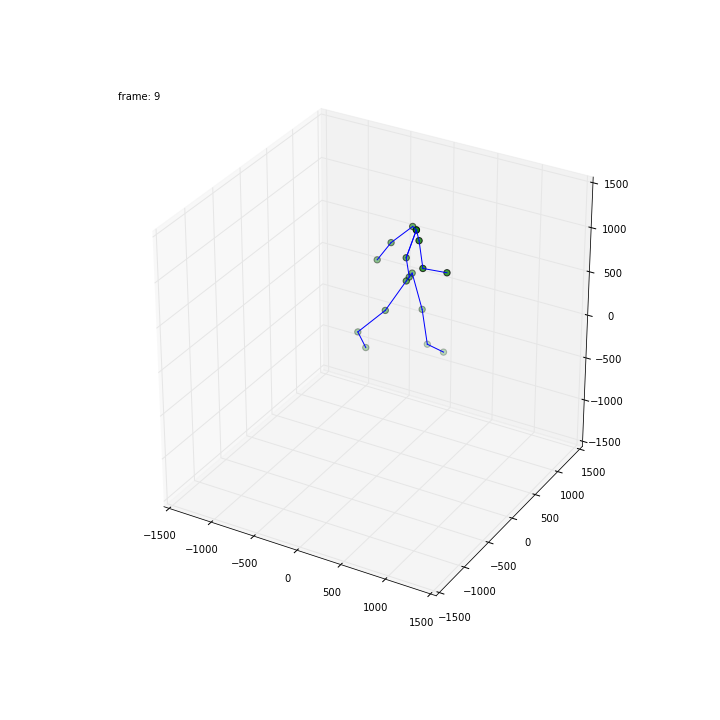
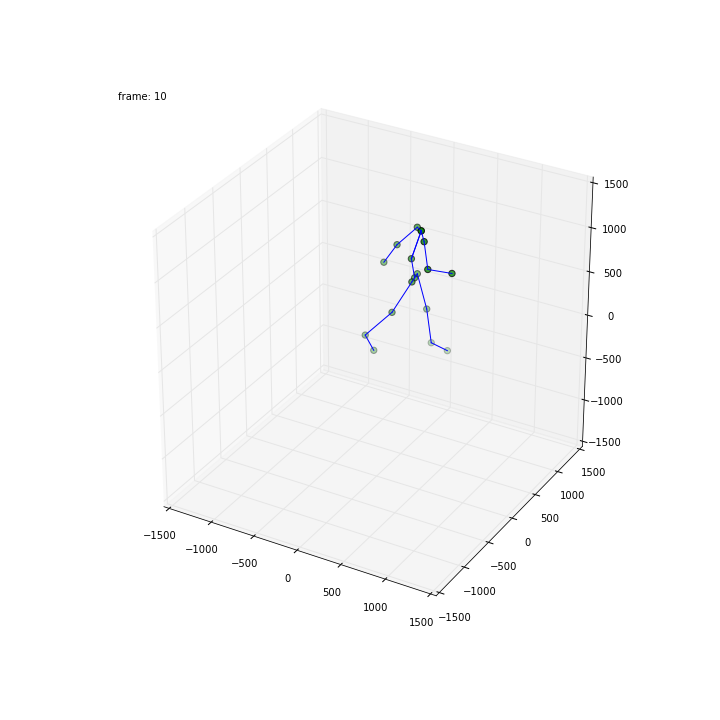
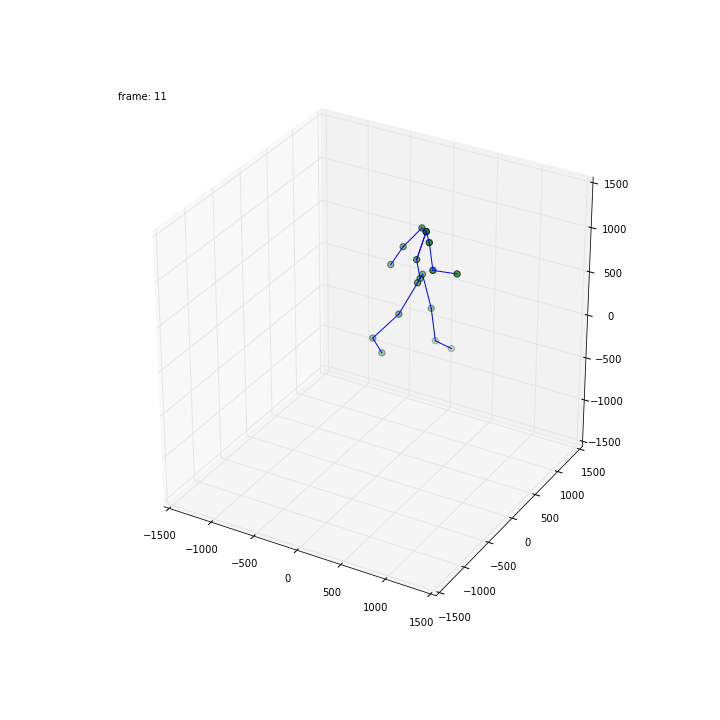
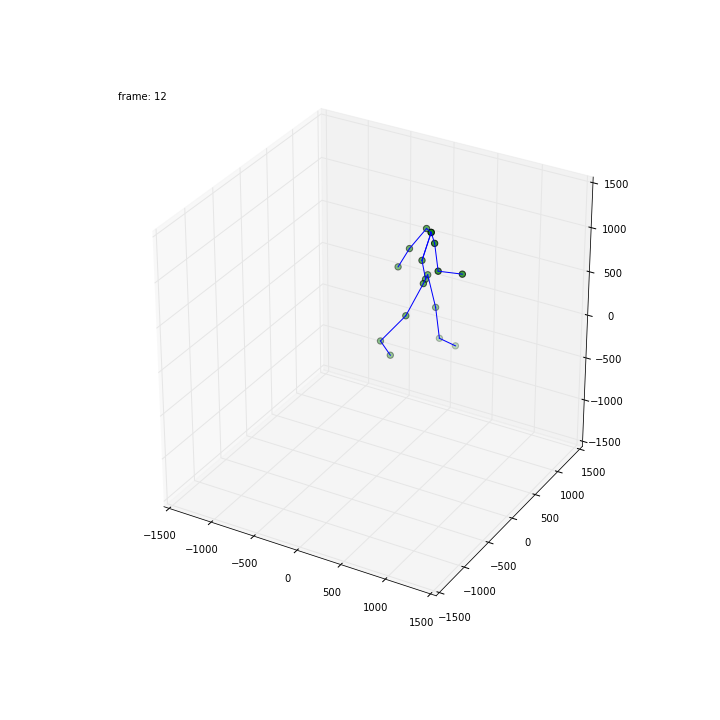
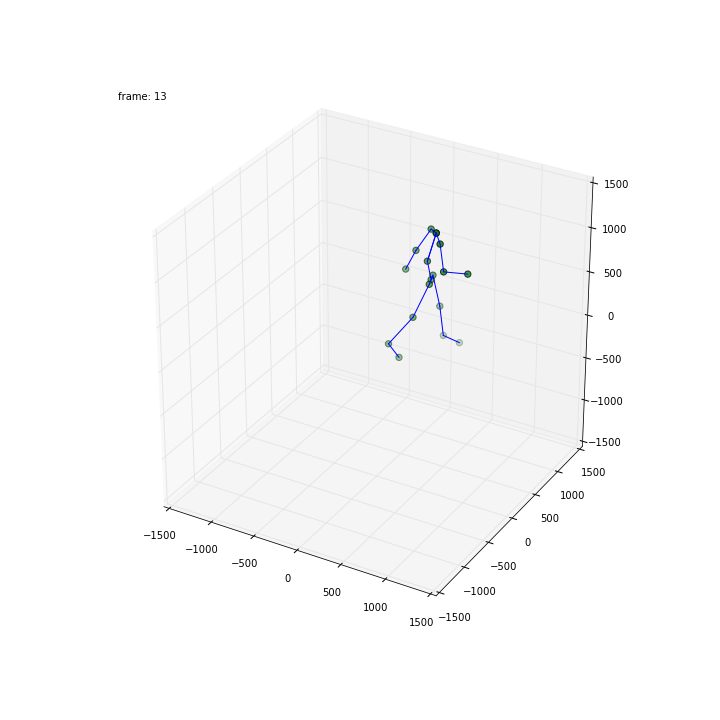
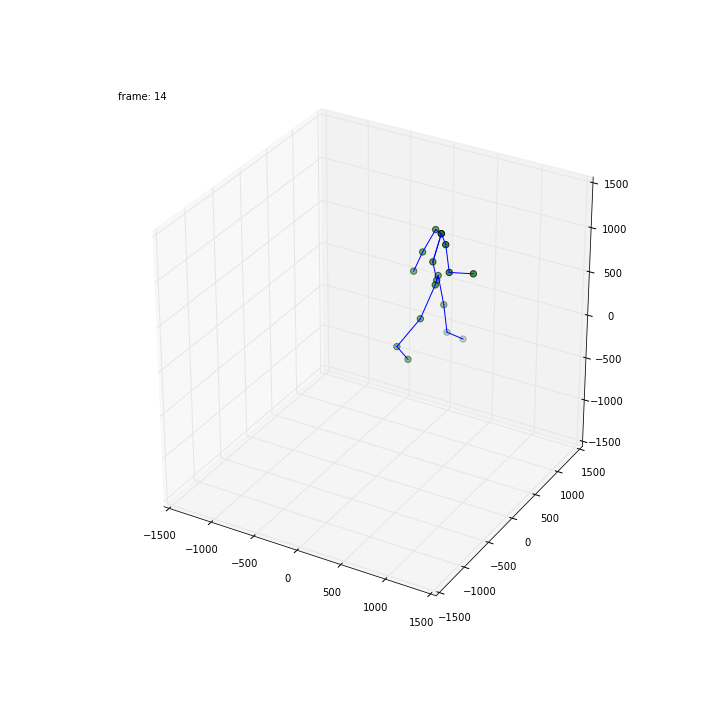
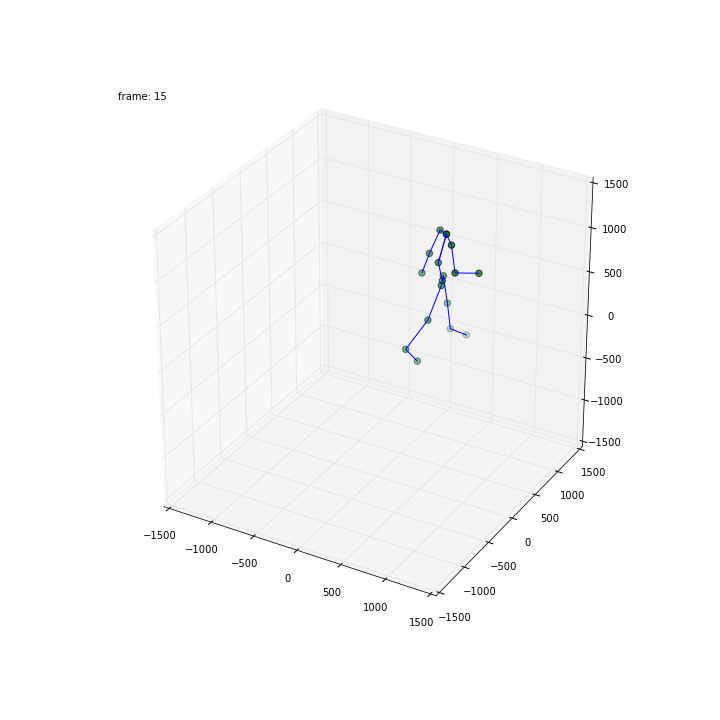
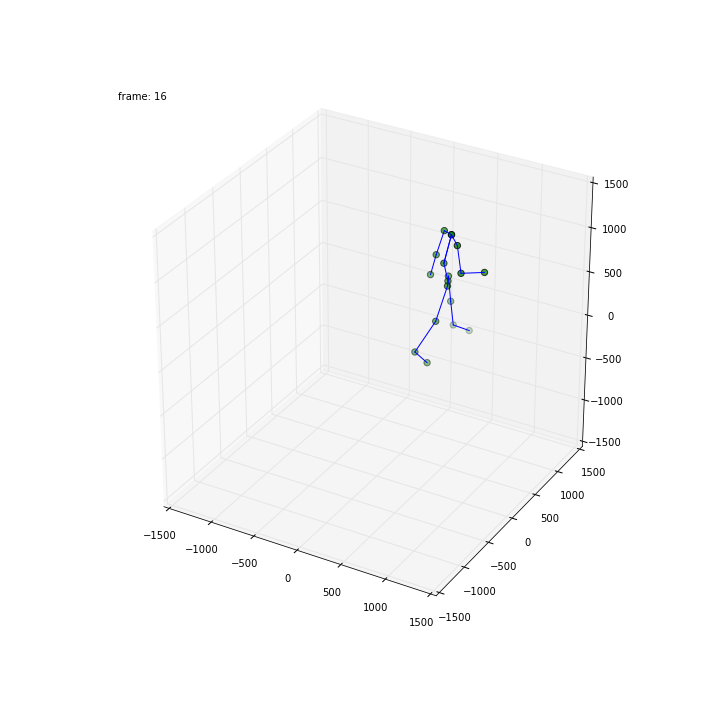
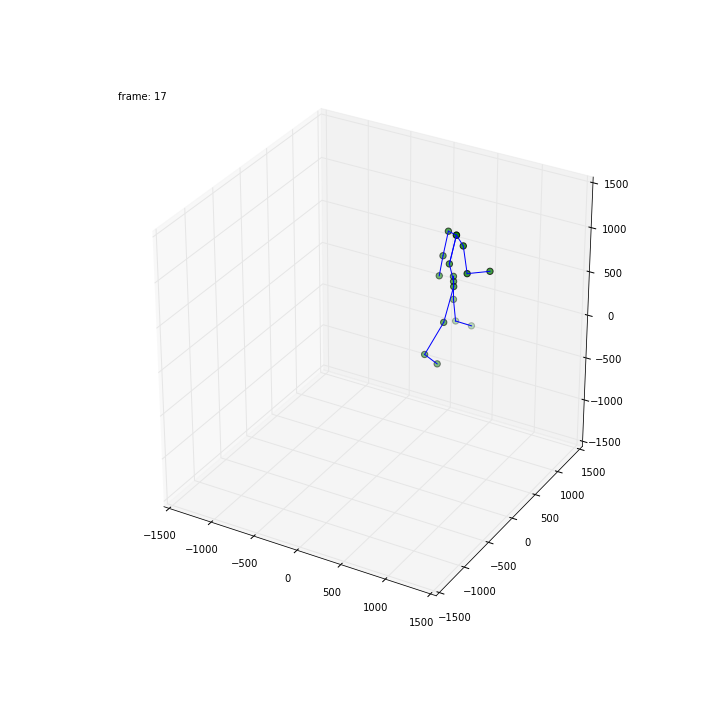
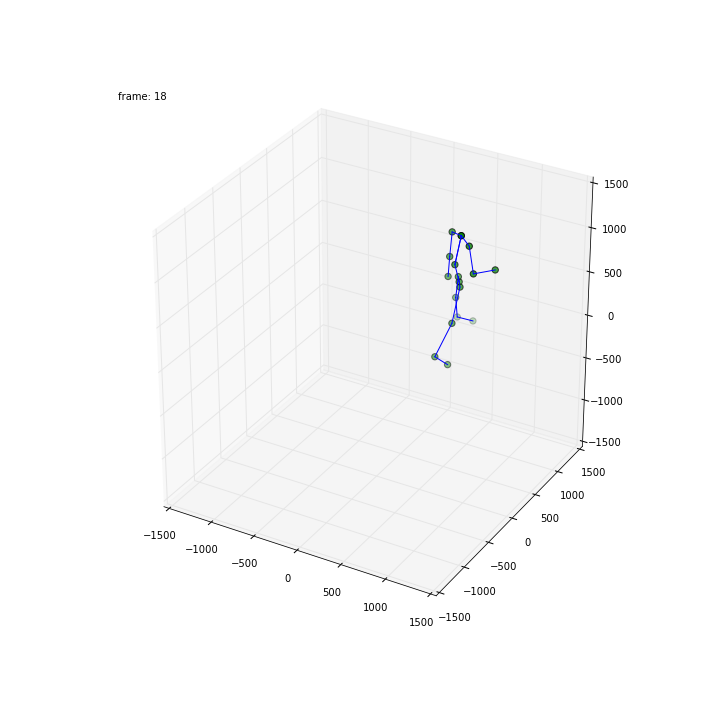
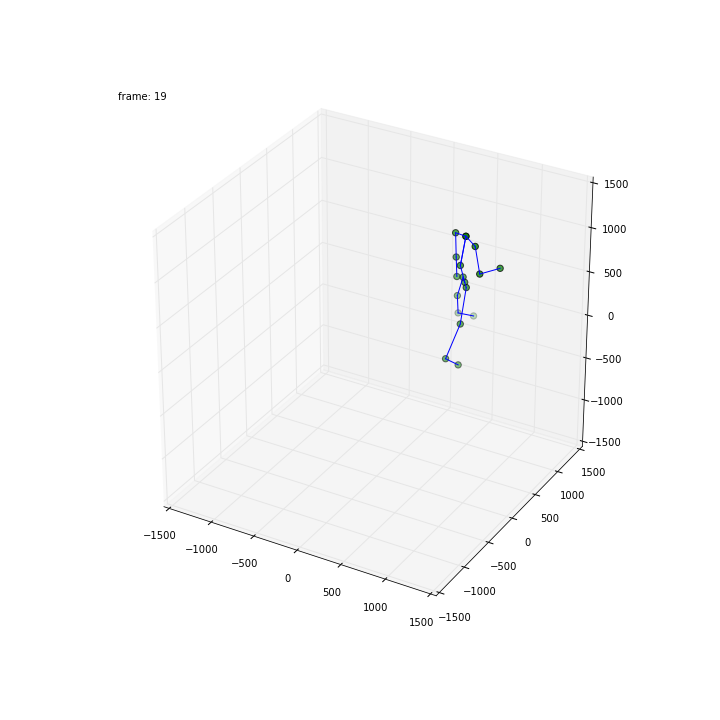
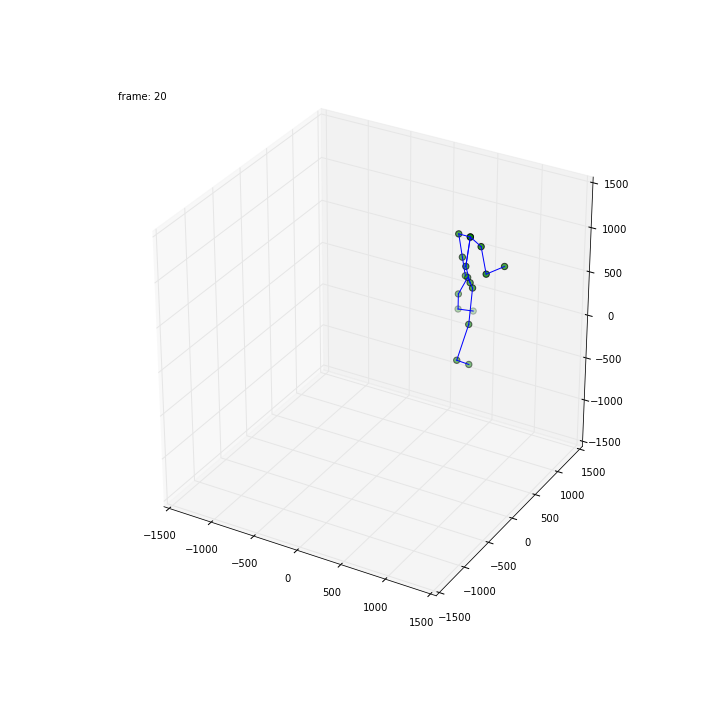
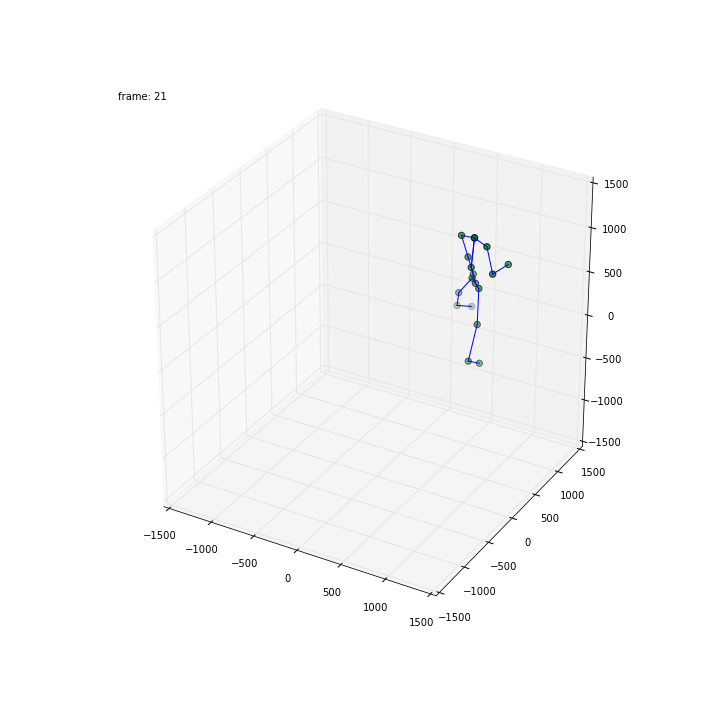
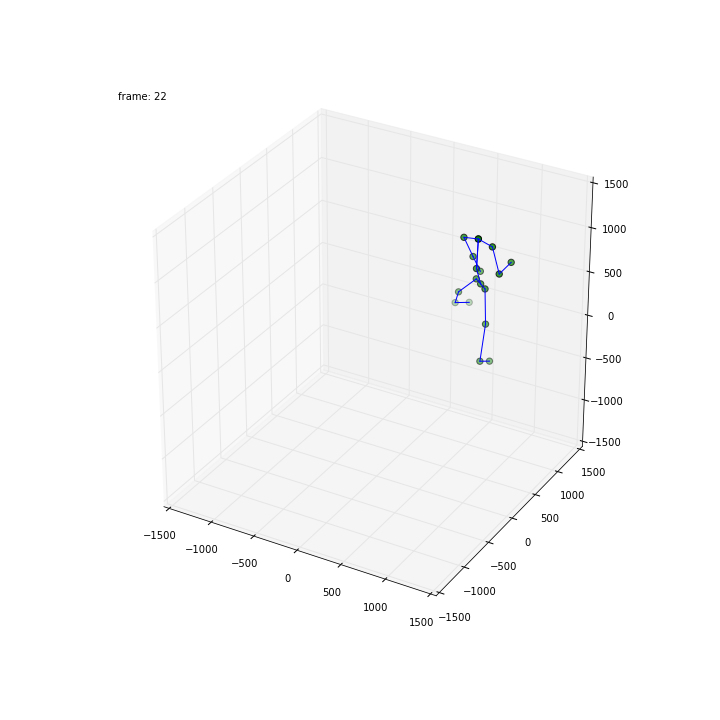
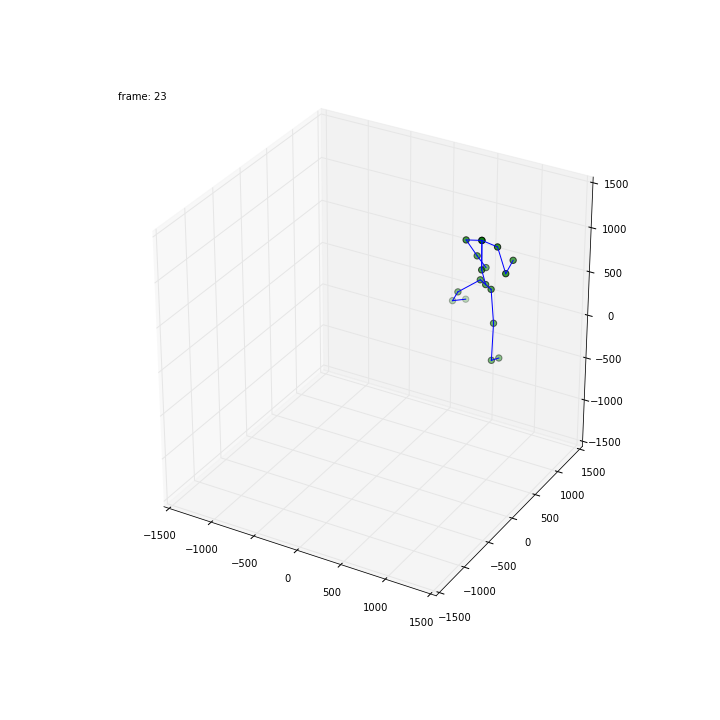
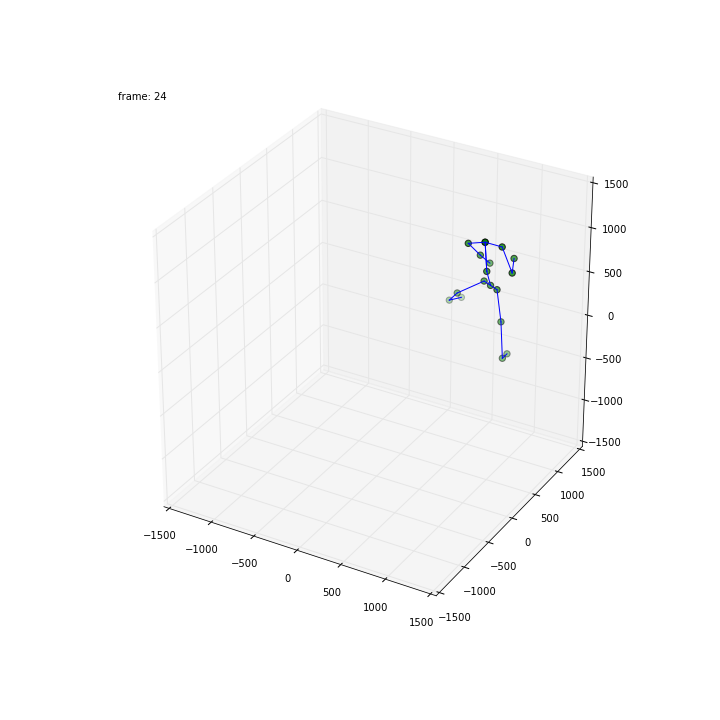
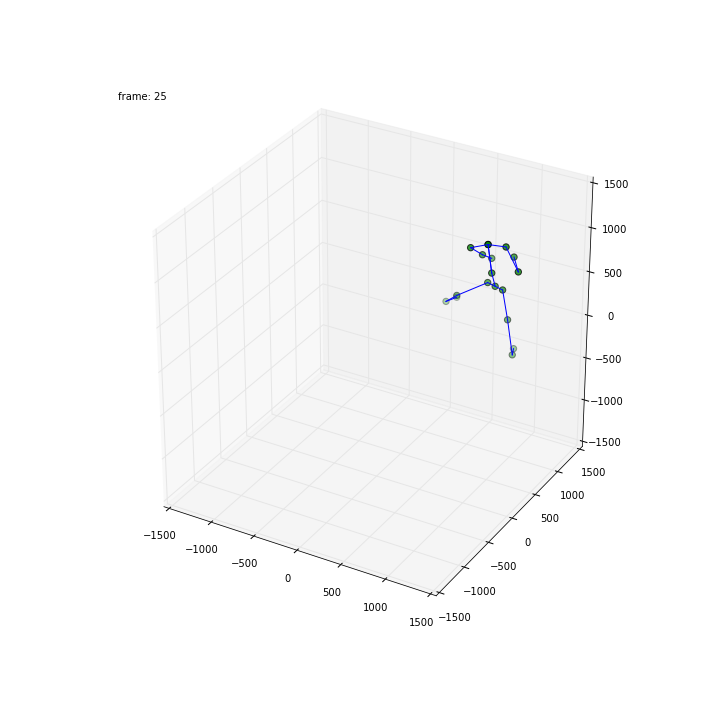
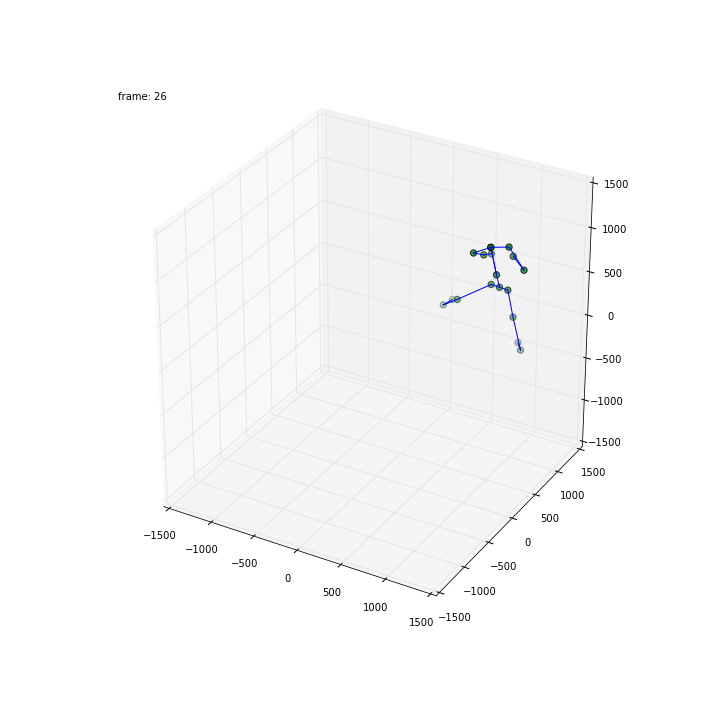
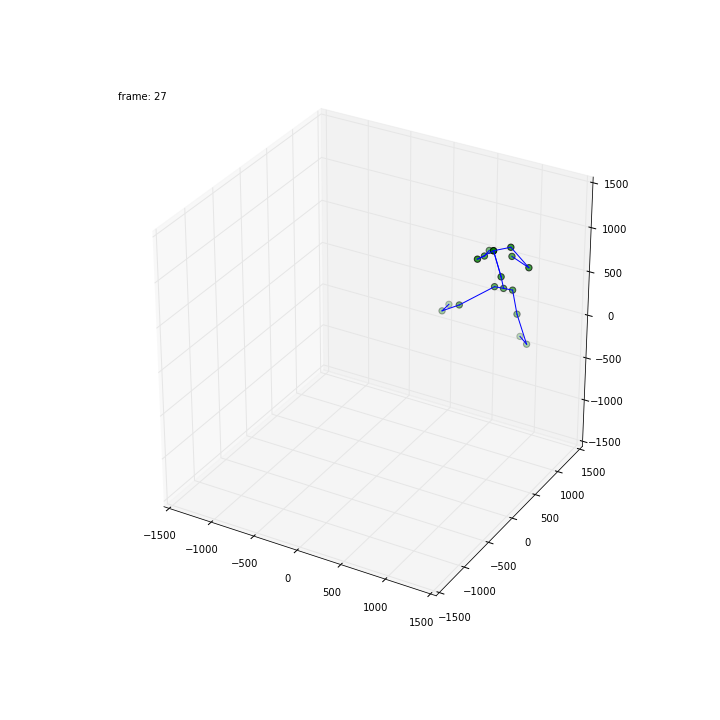
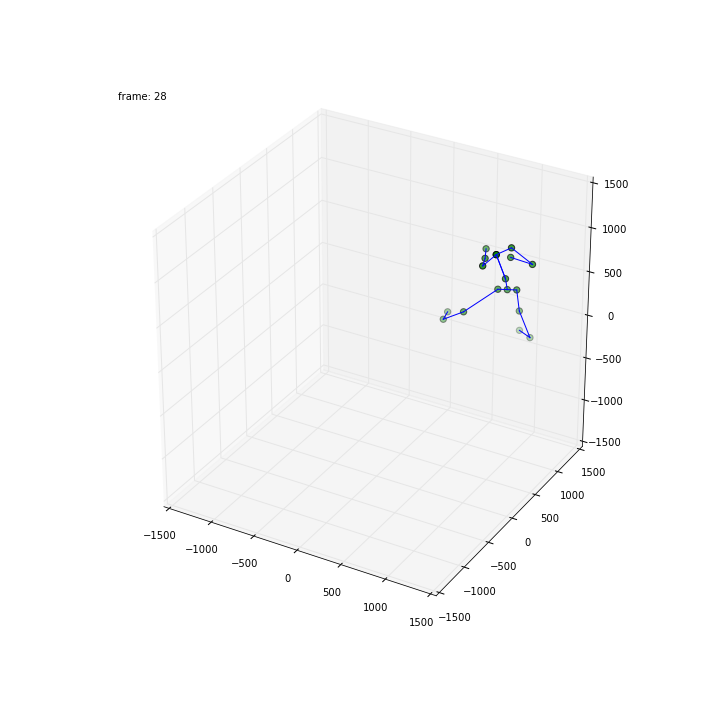
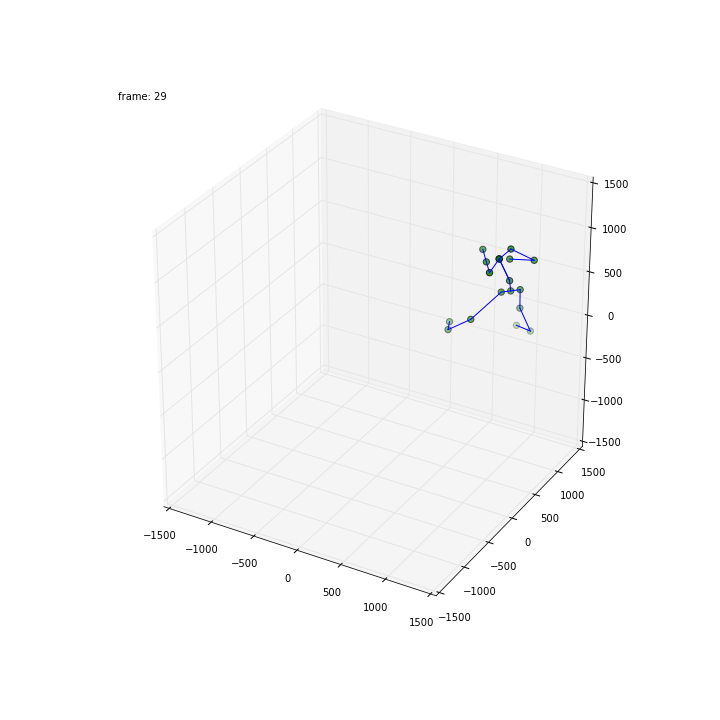
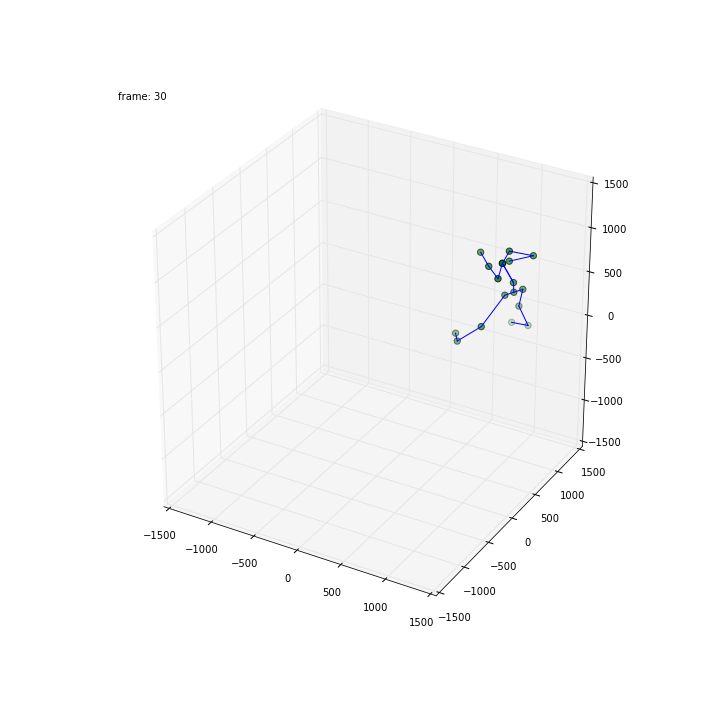
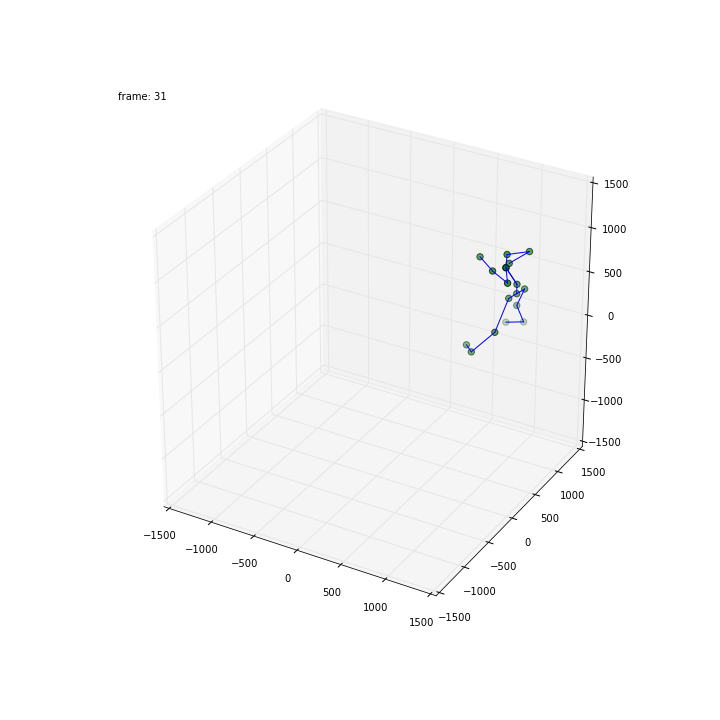
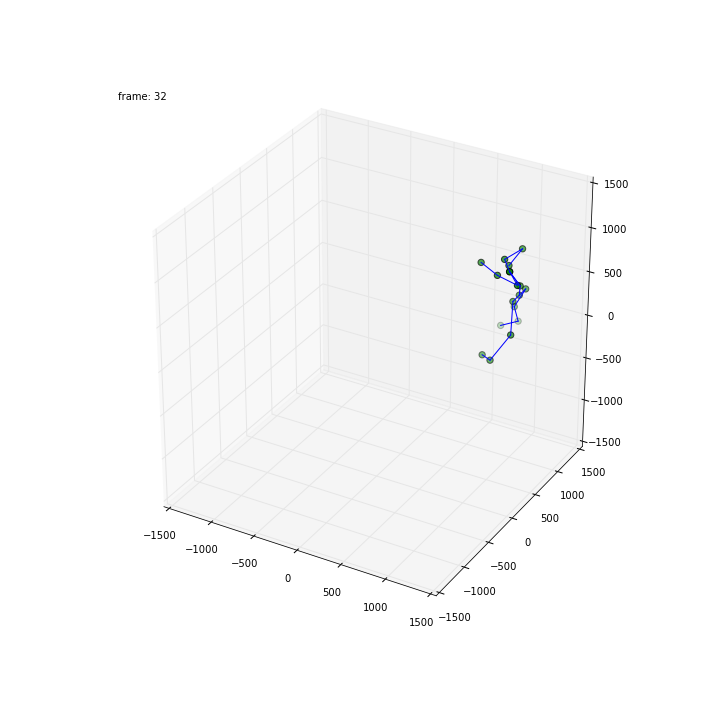
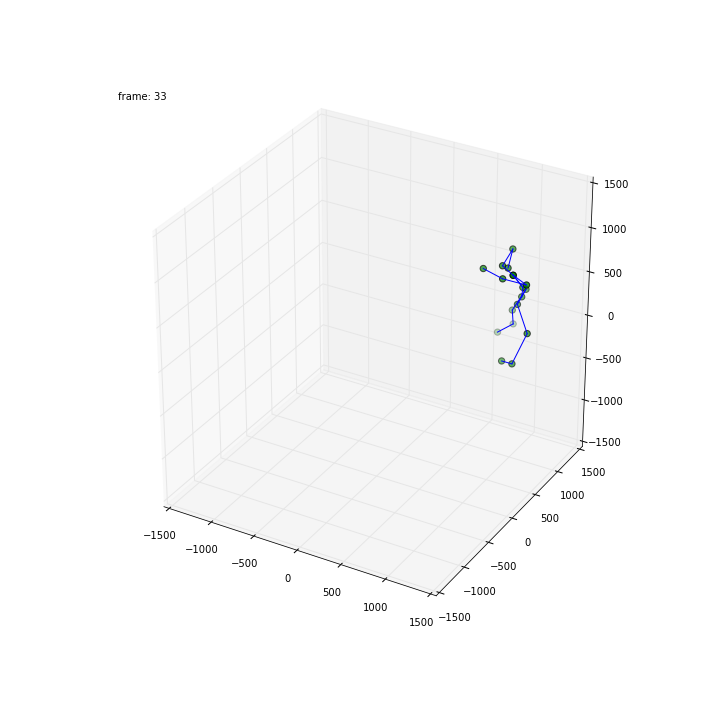
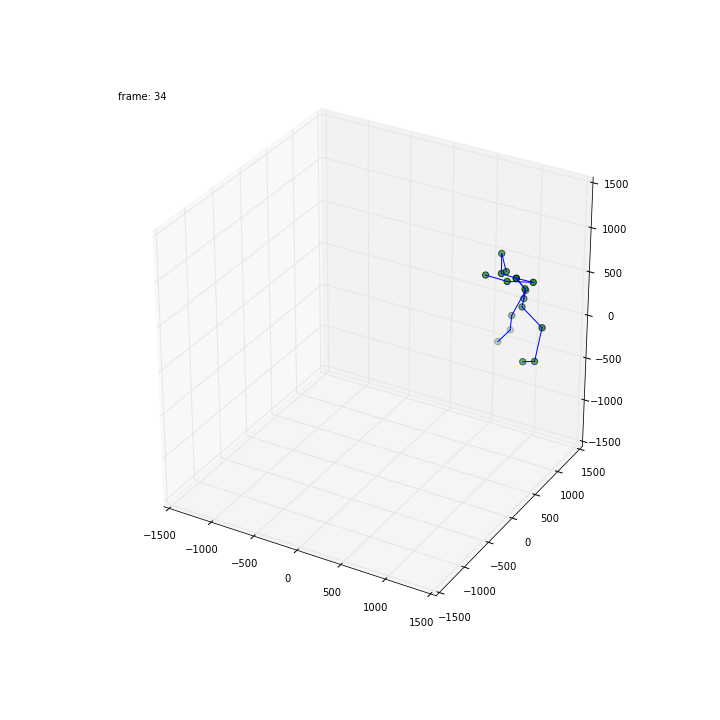
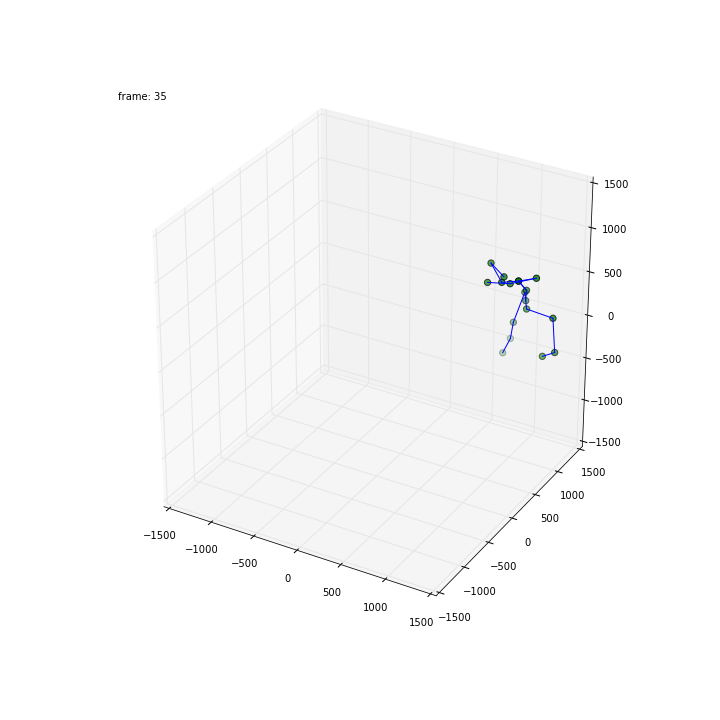
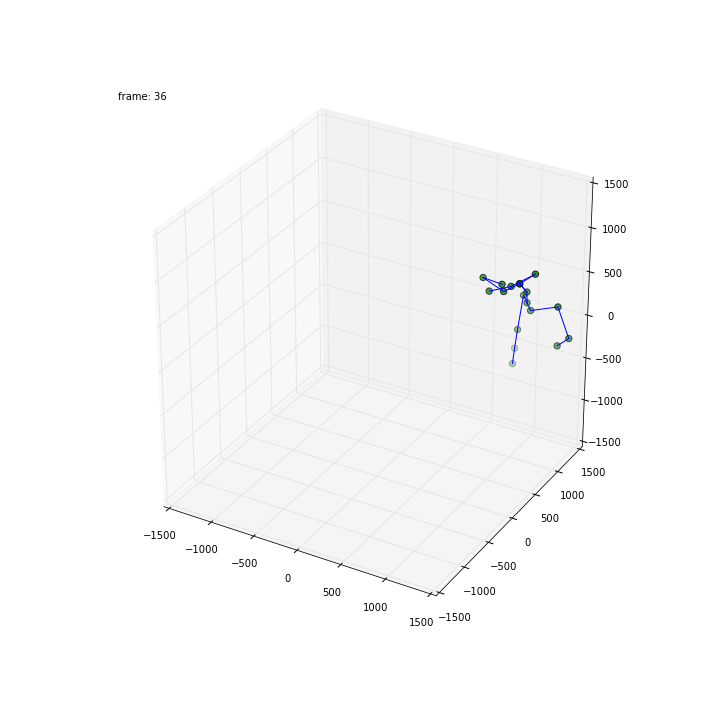
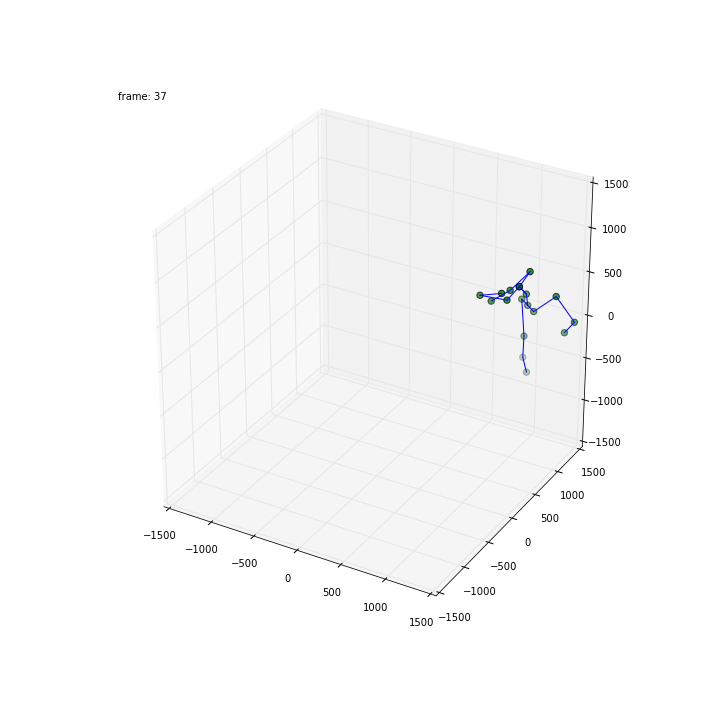
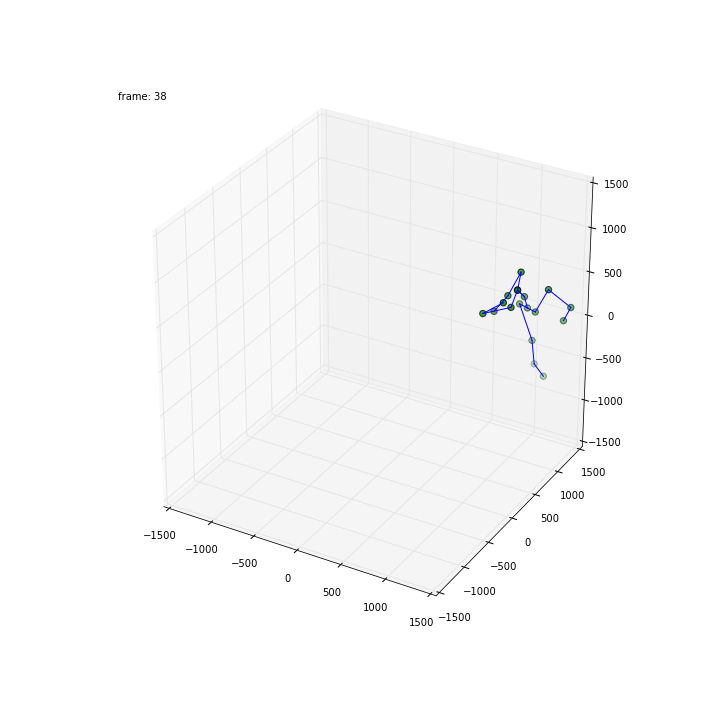
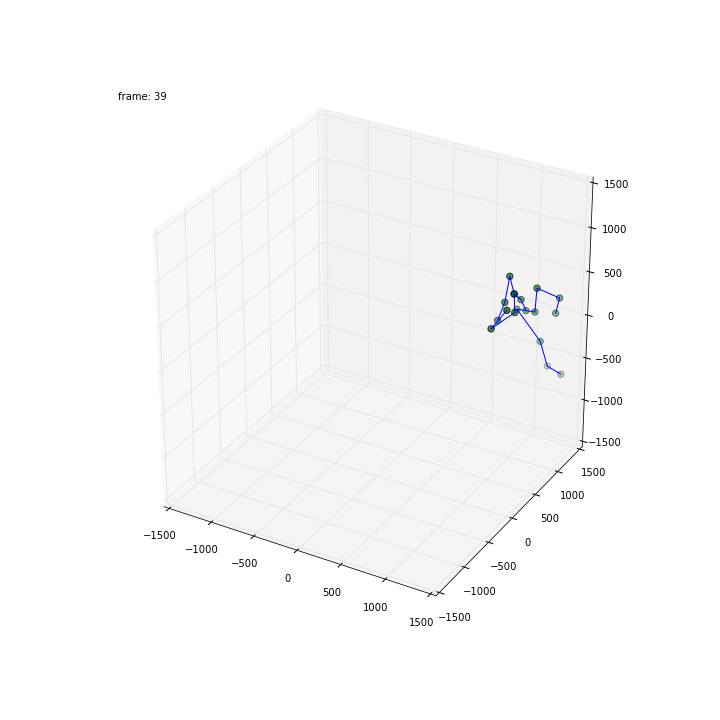
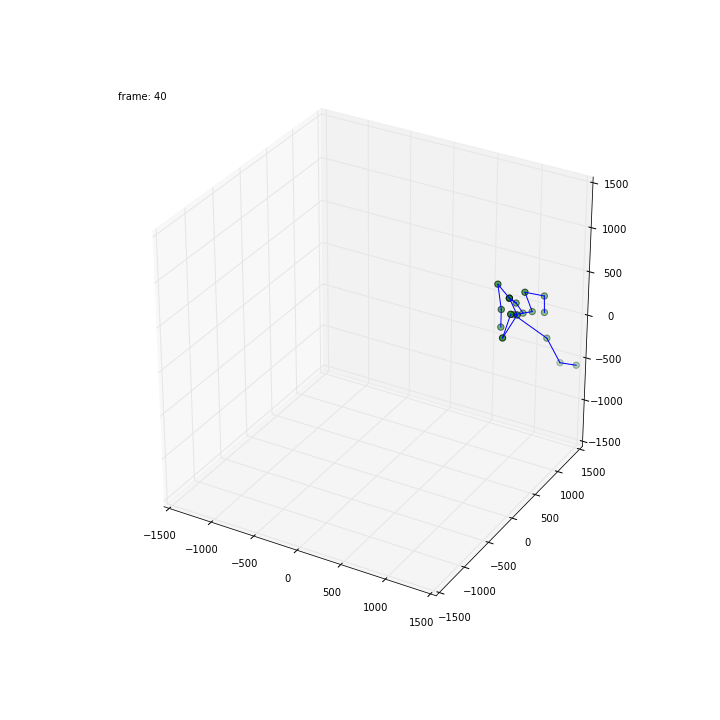
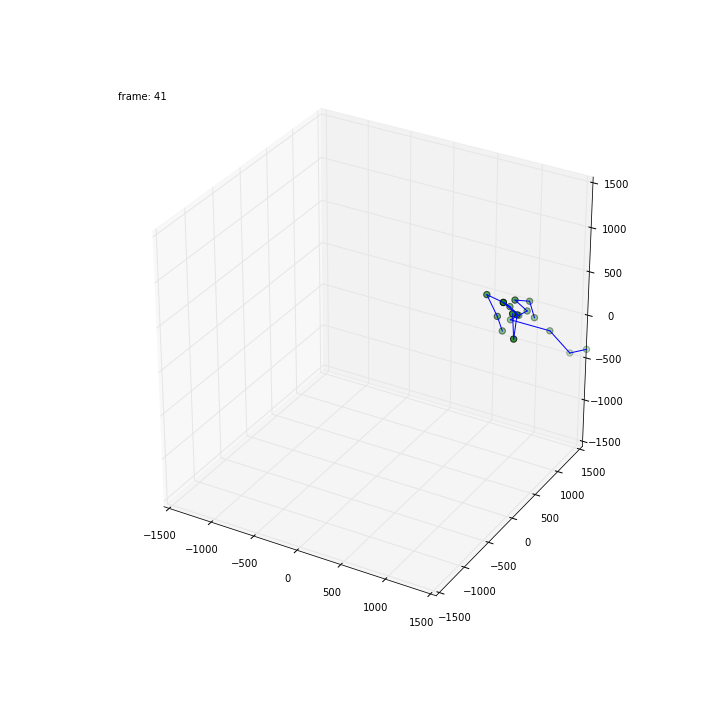
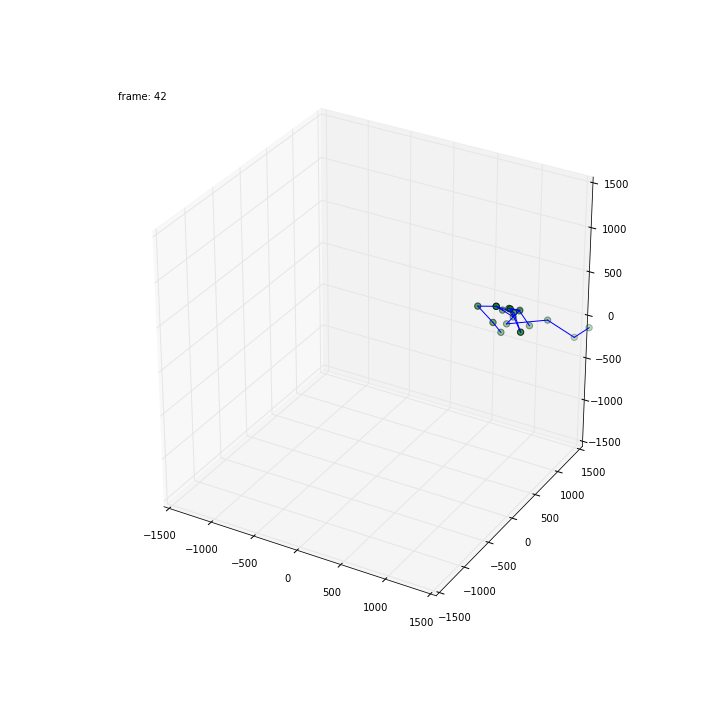
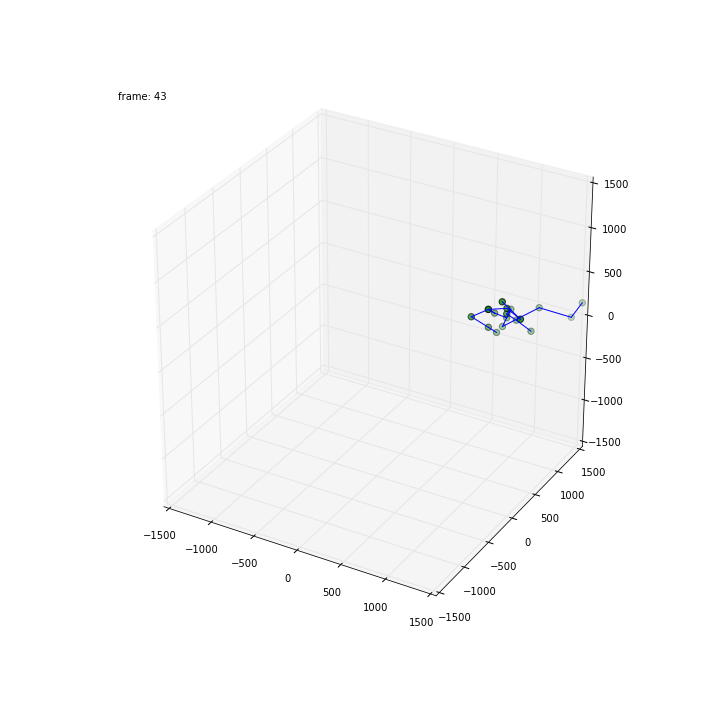
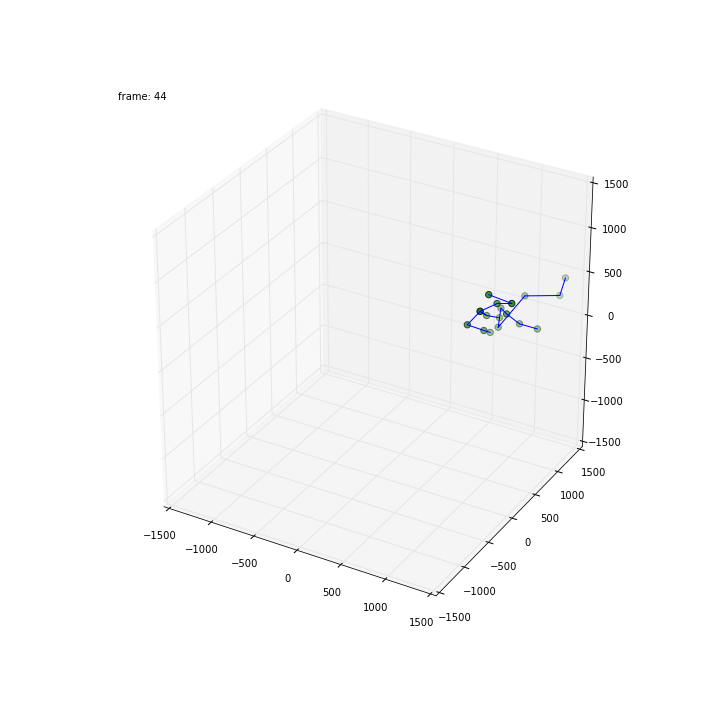
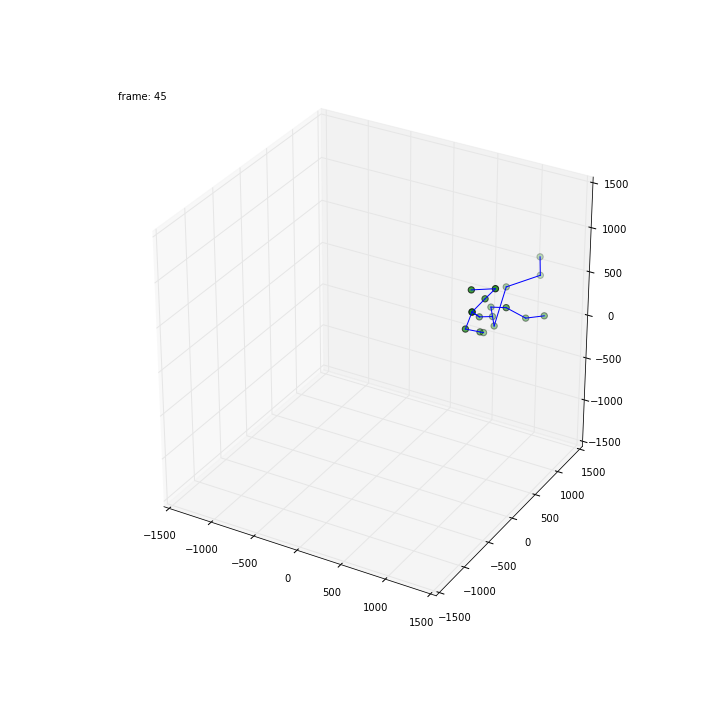
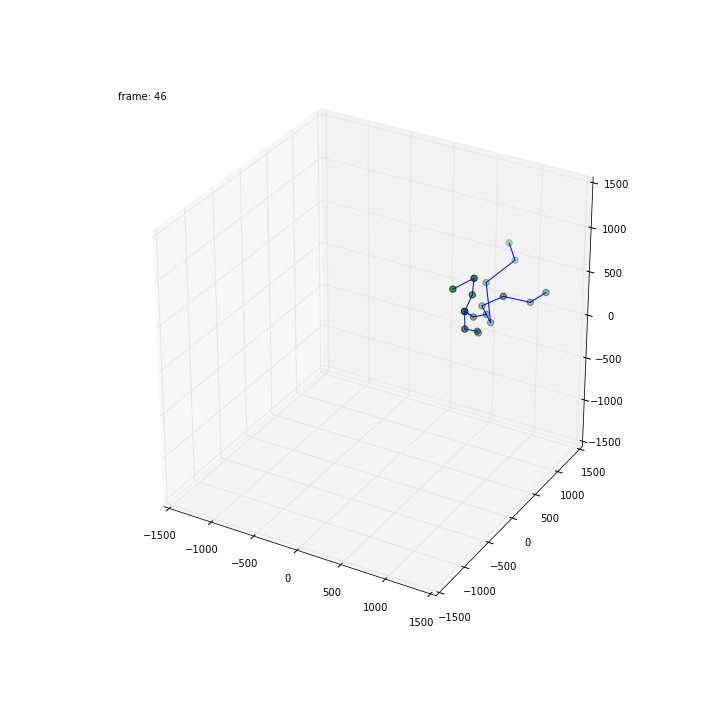
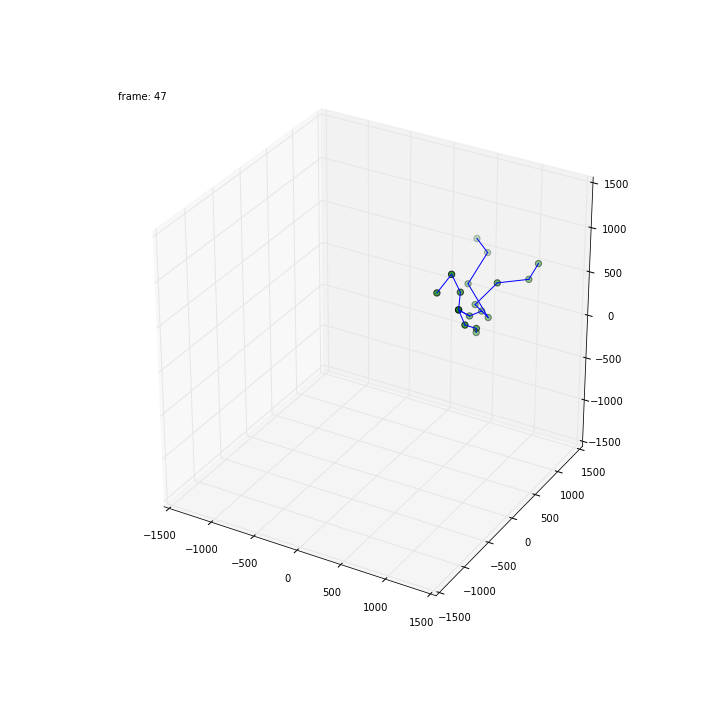
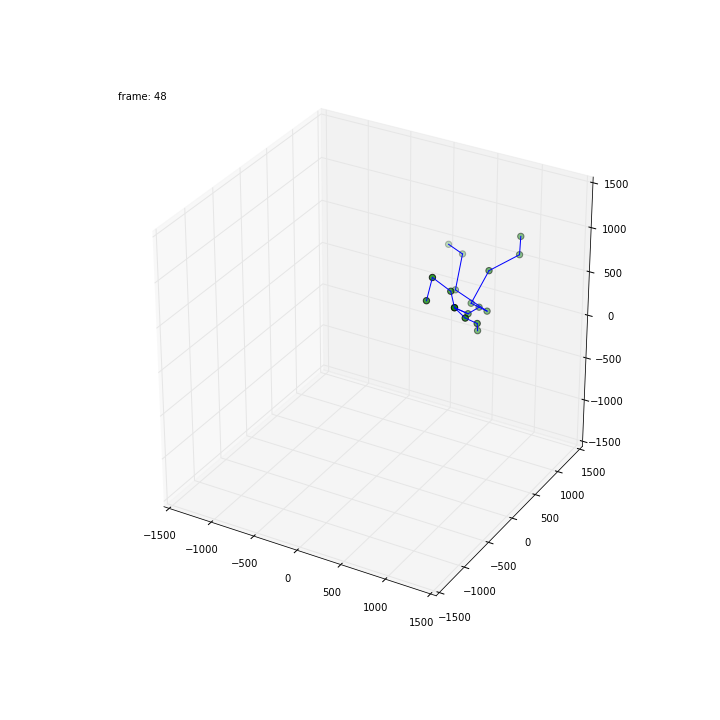

In [43]:
pos = generated_xyz[0]
start_frame = 0
end_frame = 49

skel = build_plotting_skeleton()

print pos.shape

# anim = animate_skeleton(skel, pos_joi_unnormalized[start_frame:end_frame, :])
# anim

# Make animation
anim = animate_skeleton(skel, pos[start_frame:end_frame, :], pos_joi_arr=None)

# Play animation
anim